## Modeling the Data ##

I am comparing decision tree, adaboost, gradientboost, random forest, and KNN to model my data for the best accuracy. After importing the necessary libraries and reading the data, I will be using train_test_split to split the data into training and testing sets and then standardize with StandardScaler. These sets will be used on decision tree, ada boost, gradient boost, random forest, and K Nearest Neighbors to determine which has the best accuracy score.

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from numpy import array
from sklearn import svm

In [129]:
data = pd.read_csv("heart.csv")
data = data.drop_duplicates()

In [61]:
print (data.shape)

(302, 14)


In [62]:
dataX = data.drop('target', axis=1)
dataY = data['target']

print (dataX.shape, dataY.shape)

(302, 13) (302,)


In [78]:
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=20)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(211, 13) (91, 13) (211,) (91,)


In [79]:
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

__Decision Tree Classifier__

In [113]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7582417582417582

In [114]:
confusion_matrix(y_test, y_pred)

array([[31,  9],
       [13, 38]], dtype=int64)

__Ada Boost Classifier__

In [115]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7912087912087912

In [116]:
confusion_matrix(y_test, y_pred)

array([[34,  6],
       [13, 38]], dtype=int64)

__Random Forest Classifier__

In [122]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("accuracy score:", accuracy_score(y_test, y_pred))

accuracy score: 0.8681318681318682


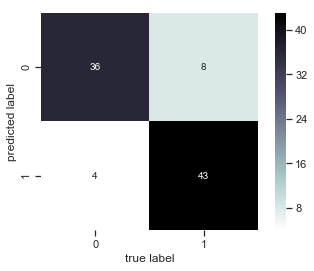

In [123]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='bone_r')
plt.xlabel('true label')
plt.ylabel('predicted label');

The accuracy score is 86.8% for the Random Forest classifier. I showed the confusion matrix in a heatmap for clearer visualization. 

__Gradient Boosting Classifier__

In [124]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8351648351648352

In [125]:
confusion_matrix(y_test, y_pred)

array([[35,  5],
       [10, 41]], dtype=int64)

__KNN using the convention k=sqrt(N) where N = # of samples in training data.__

In [126]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8791208791208791

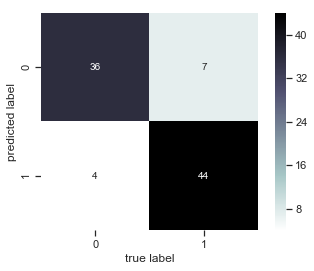

In [127]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='bone_r')
plt.xlabel('true label')
plt.ylabel('predicted label');

K Nearest Neighbors had the highest accuracy score of all models with 87.9%. I again showed the confusion matrix in a heatmap for clearer visualization.

I computed the average precision for the highest accuracy score below.

In [128]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)
average_precision

0.8677727501256912